# Parkinson's Disease Classification
The students should perform a statistical analysis of the datasets in advance and summarize relevant implications in the report, such as the underlying distributions and hypothesized forms feature dependency.

## Preprocessing
In accordance with the properties of the input dataset and the behavior of the target learning algorithm, the students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its potential impact on learning.

## Data Set Information
The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

## Attribute Information
Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats

Skipping the first row of csv file, so that we get labels on columns

In [2]:
df = pd.read_csv("dataset/pd_speech_features.csv", skiprows=1)

Exploring shape and form of the data, and data types

In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


Checking if there are null values

In [4]:
df.isna().any().sum()

0

In [5]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.shape

(756, 755)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


As we can see, the dataset is very feature rich (lots of columns), which will probably affect algorithm choise. Let's study the target variable distribution.

1    564
0    192
Name: class, dtype: int64


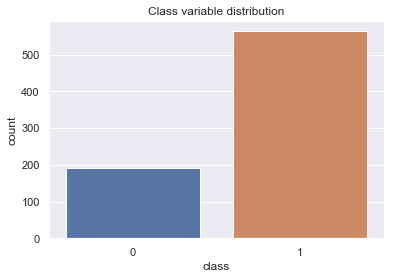

In [8]:
sns.set(style='darkgrid')
sns.countplot(df['class']).set_title('Class variable distribution')
print(df['class'].value_counts())

Dataset is somewhat unbalanced. We will deal with this by making balanced dataset and trying model performance with it.

## Duplicate values

Investigating if there are any duplicate values in the dataset

In [9]:
df.duplicated().value_counts()
df[df.id == 37]

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
111,37,0,0.79067,0.58465,0.64250,321,320,0.006004,0.000143,0.00207,...,3.5800,4.0251,2.9654,3.8369,4.2973,3.6458,3.1854,3.7708,10.0693,1
112,37,0,0.75781,0.57600,0.65037,310,309,0.006220,0.000167,0.00196,...,15.4756,9.9453,7.0538,5.7651,3.8592,4.0615,14.3037,20.1550,66.3533,1
113,37,0,0.79067,0.58465,0.64250,321,320,0.006004,0.000143,0.00207,...,3.5800,4.0251,2.9654,3.8369,4.2973,3.6458,3.1854,3.7708,10.0693,1


Dropping duplicate values

In [10]:
df.drop_duplicates(keep='first', inplace=True)
df[df.id == 37]

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
111,37,0,0.79067,0.58465,0.64250,321,320,0.006004,0.000143,0.00207,...,3.5800,4.0251,2.9654,3.8369,4.2973,3.6458,3.1854,3.7708,10.0693,1
112,37,0,0.75781,0.57600,0.65037,310,309,0.006220,0.000167,0.00196,...,15.4756,9.9453,7.0538,5.7651,3.8592,4.0615,14.3037,20.1550,66.3533,1


### Correlation matrix

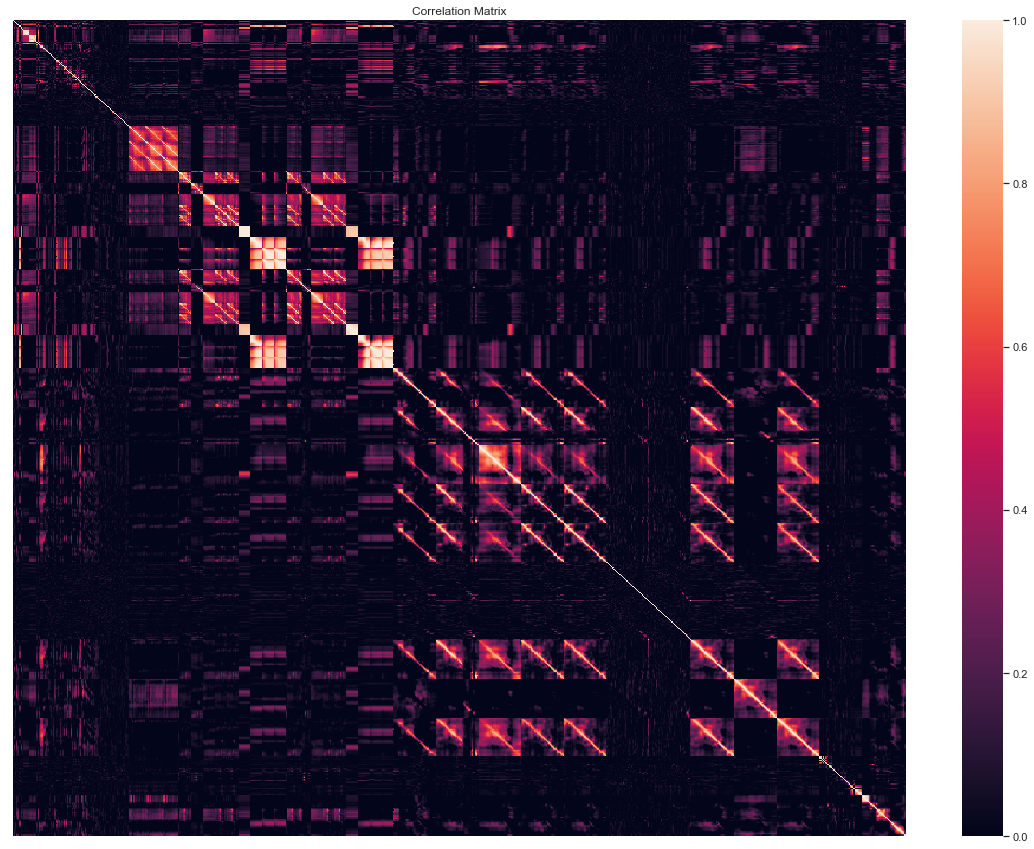

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))

# Calculate correlations
corr = df.corr()

sns.heatmap(data=corr, vmin=0, vmax=1, xticklabels=False, yticklabels=False)
ax.set(title='Correlation Matrix')
plt.show()

## Preprosessing

Preprosessing the data by producing normalized, standardized and SMOTE datasets from the original dataframe

### Normalized Dataset

Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients.

In [12]:
# Isolating the class variable
y = df.pop('class').values

In [13]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(df)
df_norm = pd.DataFrame(transformer.transform(df), columns=df.columns)
df_norm.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.000000e+00,2.226476e-10,1.898004e-10,1.599189e-10,1.274146e-10,5.343543e-08,5.321278e-08,1.795326e-12,1.932581e-14,4.853718e-13,...,3.443468e-10,3.477756e-10,5.887917e-10,8.613346e-10,9.374579e-10,1.140423e-09,9.935651e-10,5.833813e-10,6.680320e-10,4.217057e-09
1,0.000000e+00,2.337639e-10,1.792642e-10,1.624215e-10,1.261530e-10,5.470075e-08,5.446699e-08,1.930482e-12,1.708814e-14,4.558396e-13,...,3.630354e-10,3.644146e-10,8.440513e-10,5.497075e-09,3.318559e-09,2.577504e-09,2.222674e-09,1.525193e-09,1.482788e-09,1.056099e-08
2,0.000000e+00,2.410781e-10,2.051165e-10,1.629784e-10,1.421927e-10,5.593011e-08,5.568904e-08,2.010492e-12,1.456112e-14,4.242974e-13,...,3.712361e-10,3.771184e-10,5.619048e-10,2.289253e-09,2.590577e-09,2.656126e-09,1.158766e-09,7.039239e-10,7.592754e-10,1.149123e-09
3,3.215034e-10,0.000000e+00,1.322054e-10,2.561482e-10,1.905133e-10,5.722761e-08,5.690610e-08,3.490798e-12,5.875121e-14,1.347099e-12,...,2.242840e-09,1.215444e-09,1.146610e-09,1.689758e-09,4.514004e-09,1.357870e-09,1.506469e-09,1.558006e-09,2.014219e-09,1.305400e-09
4,2.574309e-10,0.000000e+00,8.441158e-11,2.053835e-10,1.365104e-10,6.075368e-08,6.049625e-08,2.101041e-12,6.870477e-13,1.377255e-12,...,2.029379e-09,1.589043e-09,1.503808e-09,1.565308e-09,1.483342e-09,2.003250e-09,3.009135e-09,2.113585e-09,1.301545e-09,1.574550e-09


### Standardized Dataset

Standardization allows comparison between features that have different units or scales.

Later, when you’re running models (logistic regression, SVMs, perceptrons, neural networks etc.) the estimated weights will update similarly rather than at different rates during the build process. This will give you more accurate results when the data has been first standardized.

In [14]:
from sklearn.preprocessing import StandardScaler

# Get column names first
names = df.columns

# Create the Scaler object
scaler = StandardScaler()

# Fit your data on the scaler object
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=names)
df_scaled.head()

C:\Users\joona\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\joona\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,-1.727354,0.967418,0.627605,0.254241,0.607415,-0.846372,-0.841852,0.932476,-0.407447,-0.055085,...,-0.446200,-0.585258,-0.619902,-0.577334,-0.482710,-0.399709,-0.485012,-0.775883,-0.815509,-0.367276
1,-1.727354,0.967418,0.121892,-0.082731,0.369956,-0.906844,-0.902212,1.039095,-0.426276,-0.142605,...,-0.446054,-0.585331,-0.590282,0.192194,0.015511,-0.067675,-0.176190,-0.527468,-0.583818,0.399406
2,-1.727354,0.967418,0.617917,-0.352452,0.735211,-0.927001,-0.922333,1.083628,-0.443731,-0.214904,...,-0.446353,-0.585203,-0.629519,-0.356924,-0.156641,-0.068147,-0.463951,-0.756815,-0.805174,-0.781450
3,-1.713603,-1.033679,-1.978992,1.381694,0.755236,-1.471252,-1.465579,2.462389,-0.275590,0.709759,...,-0.321988,-0.532702,-0.591640,-0.523000,0.007733,-0.450245,-0.471351,-0.634264,-0.589232,-0.802089
4,-1.713603,-1.033679,-2.471119,1.397501,0.301653,-0.886687,-0.882092,0.986158,3.141307,1.151162,...,-0.301236,-0.476032,-0.521890,-0.490698,-0.405295,-0.250136,-0.042709,-0.420207,-0.673037,-0.742008


### Balanced Dataset with SMOTE

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information. (https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Extracting two dataframes containing minority and majority class, converting them into ndarray
X = df.values

In [17]:
trnX, tstX, trnY, tstY = train_test_split(X, y, test_size=0.3, stratify=y)

print("Number observations trnX dataset: ", trnX.shape)
print("Number observations trnY dataset: ", trnY.shape)
print("Number observations tstX dataset: ", tstX.shape)
print("Number observations tstY dataset: ", tstY.shape)

Number observations trnX dataset:  (528, 754)
Number observations trnY dataset:  (528,)
Number observations tstX dataset:  (227, 754)
Number observations tstY dataset:  (227,)


In [18]:
print("Before OverSampling, counts of label '1': {}".format(sum(trnY==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trnY==0)))

smote = SMOTE(random_state=42)
trnXs, trnYs = smote.fit_sample(trnX, trnY.ravel())

print('After OverSampling, the shape of trnX: {}'.format(trnXs.shape))
print('After OverSampling, the shape of trnY: {} \n'.format(trnYs.shape))

print("After OverSampling, counts of label '1': {}".format(sum(trnYs==1)))
print("After OverSampling, counts of label '0': {}".format(sum(trnYs==0)))

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 134 

After OverSampling, the shape of trnX: (788, 754)
After OverSampling, the shape of trnY: (788,) 

After OverSampling, counts of label '1': 394
After OverSampling, counts of label '0': 394


## Model Training

In [19]:
# Function for plotting the confusion matrix
def plot_cnf_mtx(cnf_mtx):
    ax = sns.heatmap(cnf_mtx, annot=True, fmt="d", cbar=False, cmap='Blues')
    ax = ax.set(title='Confusion Matrix', xlabel='Predicted Label', ylabel='True Label')

### Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

In [20]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import StratifiedKFold

X = df_scaled.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

70-30 Train-test split, standardized data

C:\Users\joona\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model accuracy: 0.7841409691629956



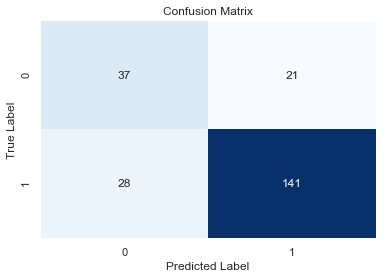

In [21]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

gnb = GaussianNB()
gnb.fit(trnX, trnY)
prdY = gnb.predict(tstX)

print('Model accuracy: {}\n'.format(metrics.accuracy_score(tstY, prdY)))

cnf_mtx = metrics.confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

StratifiedKFold cross-validation with 10 splits, standardized data

1 of KFold 10
Model accuracy: 0.7402597402597403

2 of KFold 10
Model accuracy: 0.7792207792207793

3 of KFold 10
Model accuracy: 0.7236842105263158

4 of KFold 10
Model accuracy: 0.7733333333333333

5 of KFold 10
Model accuracy: 0.88

6 of KFold 10
Model accuracy: 0.6666666666666666

7 of KFold 10
Model accuracy: 0.8266666666666667

8 of KFold 10
Model accuracy: 0.7466666666666667

9 of KFold 10
Model accuracy: 0.7733333333333333

10 of KFold 10
Model accuracy: 0.7066666666666667

Mean cross-validation score and standard deviation 0.7616498063340169 0.05743175732771854


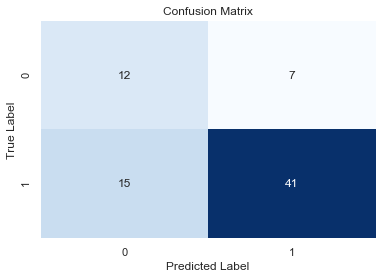

In [22]:
skf = StratifiedKFold(n_splits=10)
i = 1
cv_score = []

for train_index, test_index in skf.split(X, y):
    
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    trainX, testX = X[train_index], X[test_index]
    trainY, testY = y[train_index], y[test_index]
    
    # Training the model
    gnb = GaussianNB()
    gnb.fit(trainX, trainY)
    predictY = gnb.predict(testX)
    cv_score.append(metrics.accuracy_score(testY, predictY))

    print('Model accuracy: {}\n'.format(metrics.accuracy_score(testY, predictY)))
    i+=1

print('Mean cross-validation score and standard deviation', np.mean(cv_score), np.std(cv_score))

cnf_mtx = metrics.confusion_matrix(testY, predictY)
plot_cnf_mtx(cnf_mtx)

Naive Bayes with K best features

(755, 100)
1 of KFold 10
Model accuracy: 0.7142857142857143

2 of KFold 10
Model accuracy: 0.7792207792207793

3 of KFold 10
Model accuracy: 0.75

4 of KFold 10
Model accuracy: 0.92

5 of KFold 10
Model accuracy: 0.8133333333333334

6 of KFold 10
Model accuracy: 0.8133333333333334

7 of KFold 10
Model accuracy: 0.88

8 of KFold 10
Model accuracy: 0.7333333333333333

9 of KFold 10
Model accuracy: 0.8

10 of KFold 10
Model accuracy: 0.76

Mean cross-validation score and standard deviation 0.7963506493506494 0.061110995074603935


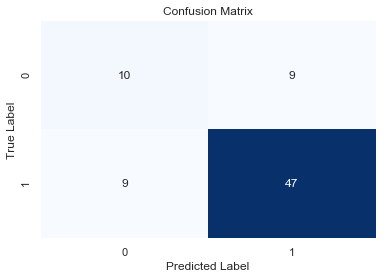

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecting 100 best features
df_kbest = SelectKBest(f_classif, k=100).fit_transform(df_scaled, y)
print(df_kbest.shape)

X = df_kbest

# Using StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=10)
i = 1
cv_score = []

for train_index, test_index in skf.split(X, y):
    
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    # Training the model
    gnb = GaussianNB()
    gnb.fit(trnX, trnY)
    prdY = gnb.predict(tstX)
    cv_score.append(metrics.accuracy_score(tstY, prdY))

    print('Model accuracy: {}\n'.format(metrics.accuracy_score(tstY, prdY)))
    i+=1

print('Mean cross-validation score and standard deviation', np.mean(cv_score), np.std(cv_score))

cnf_mtx = metrics.confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

SMOTE with 70-30 split

In [24]:
# Training the model
gnb = GaussianNB()
gnb.fit(trnXs, trnYs)
prdY = gnb.predict(tstX)

print('Model accuracy: {}\n'.format(metrics.accuracy_score(tstY, prdY)))

cnf_mtx = metrics.confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

ValueError: operands could not be broadcast together with shapes (75,100) (754,) 

### KNN

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression). Due to nature of the KNN algorithm, we are going to use normalized dataset.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

X = df_norm.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
    values[d] = yvalues

C:\Users\joona\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


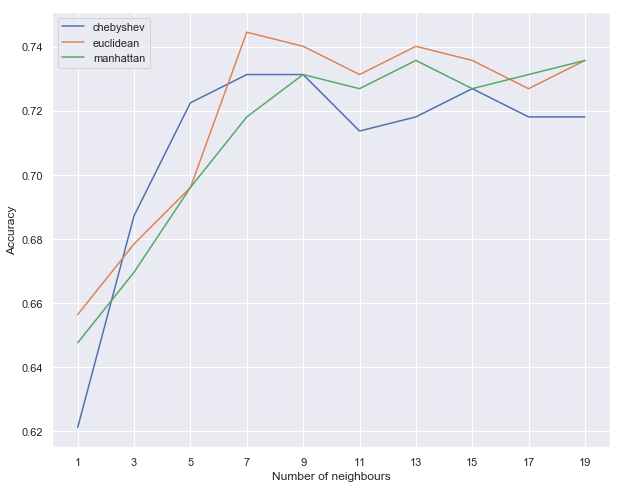

In [26]:
values_df = pd.DataFrame(values)

plt.figure(figsize=(10,8))
plt.plot(nvalues, values_df)
plt.xlabel('Number of neighbours')
plt.xticks(nvalues)
plt.ylabel('Accuracy')
plt.legend(values_df.columns)
plt.show()

StratifiedKFolds cross-validation with 10 folds, normalized data

1 of KFold 10
Model accuracy: 0.6883116883116883

2 of KFold 10
Model accuracy: 0.7792207792207793

3 of KFold 10
Model accuracy: 0.75

4 of KFold 10
Model accuracy: 0.7733333333333333

5 of KFold 10
Model accuracy: 0.7733333333333333

6 of KFold 10
Model accuracy: 0.6933333333333334

7 of KFold 10
Model accuracy: 0.8

8 of KFold 10
Model accuracy: 0.76

9 of KFold 10
Model accuracy: 0.76

10 of KFold 10
Model accuracy: 0.6

Mean cross-validation score and standard deviation 0.7377532467532467 0.05714846637168421


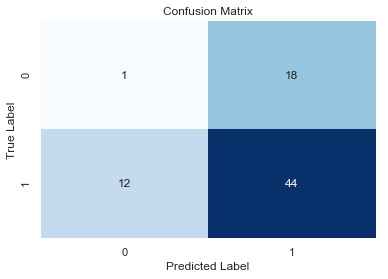

In [27]:
X = df_norm.values

skf = StratifiedKFold(n_splits=10)
i = 1
cv_score = []

for train_index, test_index in skf.split(X, y):
    
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    # Training the model
    knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
    knn.fit(trnX, trnY)
    prdY = knn.predict(tstX)
    
    cv_score.append(metrics.accuracy_score(tstY, prdY))
    print('Model accuracy: {}\n'.format(metrics.accuracy_score(tstY, prdY)))
    i+=1

print('Mean cross-validation score and standard deviation', np.mean(cv_score), np.std(cv_score))

cnf_mtx = metrics.confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

K Best features with StratifiedKFolds

1 of KFold 10
Model accuracy: 0.7662337662337663

2 of KFold 10
Model accuracy: 0.8181818181818182

3 of KFold 10
Model accuracy: 0.8026315789473685

4 of KFold 10
Model accuracy: 0.88

5 of KFold 10
Model accuracy: 0.88

6 of KFold 10
Model accuracy: 0.8266666666666667

7 of KFold 10
Model accuracy: 0.8933333333333333

8 of KFold 10
Model accuracy: 0.7733333333333333

9 of KFold 10
Model accuracy: 0.8133333333333334

10 of KFold 10
Model accuracy: 0.76

Mean cross-validation score and standard deviation 0.8213713830029621 0.04649883144706657


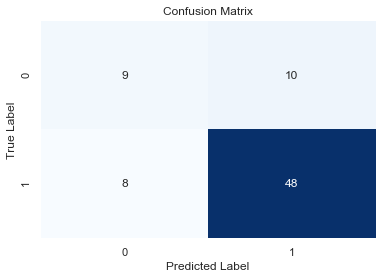

In [28]:
X = df_kbest

skf = StratifiedKFold(n_splits=10)
i = 1
cv_score = []

for train_index, test_index in skf.split(X, y):
    
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    # Training the model
    knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
    knn.fit(trnX, trnY)
    prdY = knn.predict(tstX)
    
    cv_score.append(metrics.accuracy_score(tstY, prdY))
    print('Model accuracy: {}\n'.format(metrics.accuracy_score(tstY, prdY)))
    i+=1

print('Mean cross-validation score and standard deviation', np.mean(cv_score), np.std(cv_score))

cnf_mtx = metrics.confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

### Desicion Tree

70-30 train-test split

C:\Users\joona\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Model accuracy: 0.8281938325991189



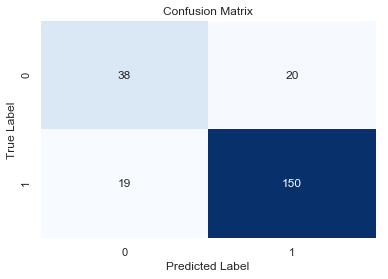

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Training trees with unpreprosessed data
X = df
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, criterion='gini')
tree.fit(trnX, trnY)
prdY = tree.predict(tstX)

print('Model accuracy: {}\n'.format(metrics.accuracy_score(tstY, prdY)))

cnf_mtx = metrics.confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

StratifiedKFolds cross-validation with 10 folds

1 of KFold 10
Model accuracy: 0.7792207792207793

2 of KFold 10
Model accuracy: 0.7272727272727273

3 of KFold 10
Model accuracy: 0.7894736842105263

4 of KFold 10
Model accuracy: 0.8

5 of KFold 10
Model accuracy: 0.7733333333333333

6 of KFold 10
Model accuracy: 0.8133333333333334

7 of KFold 10
Model accuracy: 0.76

8 of KFold 10
Model accuracy: 0.6533333333333333

9 of KFold 10
Model accuracy: 0.8

10 of KFold 10
Model accuracy: 0.48

Mean cross-validation score and standard deviation 0.7375967190704034 0.0965868214772889


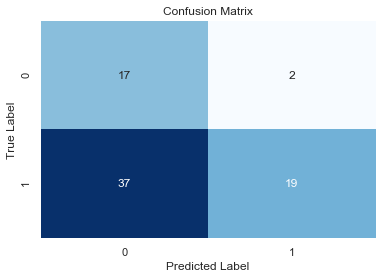

In [34]:
X = df.values

skf = StratifiedKFold(n_splits=10)
i = 1
cv_score = []

for train_index, test_index in skf.split(X, y):
    
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    # Training the model
    tree = DecisionTreeClassifier(min_samples_leaf=1, max_depth=10, criterion='gini')
    tree.fit(trnX, trnY)
    prdY = tree.predict(tstX)
    
    cv_score.append(metrics.accuracy_score(tstY, prdY))
    print('Model accuracy: {}\n'.format(metrics.accuracy_score(tstY, prdY)))
    i+=1

print('Mean cross-validation score and standard deviation', np.mean(cv_score), np.std(cv_score))

cnf_mtx = metrics.confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

K Best features with StratifiedKfold 10 folds

1 of KFold 10
Model accuracy: 0.7142857142857143

2 of KFold 10
Model accuracy: 0.8181818181818182

3 of KFold 10
Model accuracy: 0.8026315789473685

4 of KFold 10
Model accuracy: 0.8

5 of KFold 10
Model accuracy: 0.8

6 of KFold 10
Model accuracy: 0.7733333333333333

7 of KFold 10
Model accuracy: 0.76

8 of KFold 10
Model accuracy: 0.6

9 of KFold 10
Model accuracy: 0.7866666666666666

10 of KFold 10
Model accuracy: 0.68

Mean cross-validation score and standard deviation 0.7535099111414901 0.06554391486921617


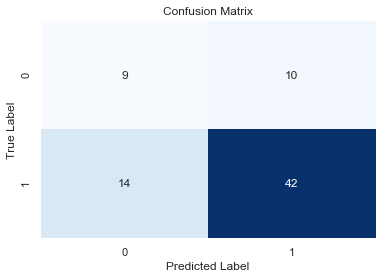

In [35]:
X = df_kbest

skf = StratifiedKFold(n_splits=10)
i = 1
cv_score = []

for train_index, test_index in skf.split(X, y):
    
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    # Training the model
    tree = DecisionTreeClassifier(min_samples_leaf=1, max_depth=10, criterion='gini')
    tree.fit(trnX, trnY)
    prdY = tree.predict(tstX)
    
    cv_score.append(metrics.accuracy_score(tstY, prdY))
    print('Model accuracy: {}\n'.format(metrics.accuracy_score(tstY, prdY)))
    i+=1

print('Mean cross-validation score and standard deviation', np.mean(cv_score), np.std(cv_score))

cnf_mtx = metrics.confusion_matrix(tstY, prdY)
plot_cnf_mtx(cnf_mtx)

SMOTE, kbest + stratifiedkfolds

For fold {fold}:
Model accuracy: 0.7236842105263158

For fold {fold}:
Model accuracy: 0.7763157894736842

For fold {fold}:
Model accuracy: 0.8157894736842105

For fold {fold}:
Model accuracy: 0.6973684210526315

For fold {fold}:
Model accuracy: 0.8157894736842105

For fold {fold}:
Model accuracy: 0.88

For fold {fold}:
Model accuracy: 0.7733333333333333

For fold {fold}:
Model accuracy: 0.7733333333333333

For fold {fold}:
Model accuracy: 0.7333333333333333

For fold {fold}:
Model accuracy: 0.6666666666666666

Mean cross-validation score and standard deviation 0.7655614035087719 0.059666718251059694


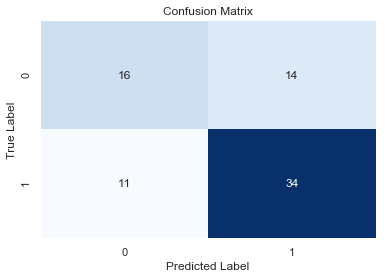

In [36]:
from sklearn.model_selection import KFold

X = df_kbest
kf = KFold(n_splits=10)
i = 1
cv_score = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
    
    model = DecisionTreeClassifier(min_samples_leaf=1, max_depth=10, criterion='gini')
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    
    cv_score.append(metrics.accuracy_score(y_test, y_pred))
    i+=1
    
    print('For fold {fold}:')
    print('Model accuracy: {}\n'.format(metrics.accuracy_score(y_test, y_pred)))
    
print('Mean cross-validation score and standard deviation', np.mean(cv_score), np.std(cv_score))

cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
plot_cnf_mtx(cnf_mtx)

### Random Forest

Use feature selection when using random forest, because it works well only when features are diverse and not correlated

### Ensembles

## Notes

Apply all algorithms to both datasets

Focus on classification on the first dataset

Look for classification dataset PD with clustering. Are there some subgroups?

When evaluating models: Look into sensitivity, spesifisity